In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import plotly.tools as tls
from plotly.tools import FigureFactory as FF

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("s3://team5project/data1.csv/part-00000-89e4e981-b690-48ea-9e84-dbd29c002ff9-c000.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,23,Yes,Travel_Frequently,125,Sales,28,1,Life Sciences,1,849750,...,2,80,4,36,2,1,28,1,11,1
1,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,828818,...,4,80,4,11,4,1,19,19,18,2
2,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,1,407506,...,1,80,1,12,1,1,10,7,10,2
3,27,Yes,Travel_Frequently,670,Sales,20,3,Other,1,503493,...,1,80,3,33,4,1,9,7,7,3
4,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,1,453899,...,3,80,3,19,6,4,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701288,55,No,Travel_Rarely,653,Human Resources,1,2,Marketing,1,341418,...,1,80,1,9,4,4,6,1,6,5
701289,22,Yes,Travel_Rarely,1401,Software,22,4,Human Resources,1,704298,...,1,80,1,14,2,2,9,6,9,5
701290,48,Yes,Travel_Rarely,292,Life Sciences,39,3,Marketing,1,917368,...,1,80,3,33,3,1,9,6,8,1
701291,53,No,Travel_Rarely,1440,Human Resources,24,2,Life Sciences,1,322173,...,4,80,2,19,2,3,3,1,2,2


In [3]:
header=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df. columns=header 
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,Yes,Travel_Frequently,125,Sales,28,1,Life Sciences,1,849750,...,2,80,4,36,2,1,28,1,11,1
1,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,828818,...,4,80,4,11,4,1,19,19,18,2
2,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,1,407506,...,1,80,1,12,1,1,10,7,10,2
3,27,Yes,Travel_Frequently,670,Sales,20,3,Other,1,503493,...,1,80,3,33,4,1,9,7,7,3
4,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,1,453899,...,3,80,3,19,6,4,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701288,55,No,Travel_Rarely,653,Human Resources,1,2,Marketing,1,341418,...,1,80,1,9,4,4,6,1,6,5
701289,22,Yes,Travel_Rarely,1401,Software,22,4,Human Resources,1,704298,...,1,80,1,14,2,2,9,6,9,5
701290,48,Yes,Travel_Rarely,292,Life Sciences,39,3,Marketing,1,917368,...,1,80,3,33,3,1,9,6,8,1
701291,53,No,Travel_Rarely,1440,Human Resources,24,2,Life Sciences,1,322173,...,4,80,2,19,2,3,3,1,2,2


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,Yes,Travel_Frequently,125,Sales,28,1,Life Sciences,1,849750,...,2,80,4,36,2,1,28,1,11,1
1,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,828818,...,4,80,4,11,4,1,19,19,18,2
2,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,1,407506,...,1,80,1,12,1,1,10,7,10,2
3,27,Yes,Travel_Frequently,670,Sales,20,3,Other,1,503493,...,1,80,3,33,4,1,9,7,7,3
4,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,1,453899,...,3,80,3,19,6,4,1,1,1,2


In [5]:
df.shape

(701293, 35)

# Remove unneccessary columns

In [6]:
df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True)

In [7]:
df.shape

(701293, 30)

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [9]:
df.info()  #to show the count of non-null values and datatype of features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701293 entries, 0 to 701292
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       701293 non-null  int64 
 1   Attrition                 701293 non-null  object
 2   BusinessTravel            701293 non-null  object
 3   DailyRate                 701293 non-null  int64 
 4   Department                701293 non-null  object
 5   DistanceFromHome          701293 non-null  int64 
 6   Education                 701293 non-null  int64 
 7   EducationField            701293 non-null  object
 8   EnvironmentSatisfaction   701293 non-null  int64 
 9   Gender                    701293 non-null  object
 10  HourlyRate                701293 non-null  int64 
 11  JobInvolvement            701293 non-null  int64 
 12  JobLevel                  701293 non-null  int64 
 13  JobRole                   701293 non-null  object
 14  JobS

#### This data set doesnt have non-null values as it is equal to number of rows.

In [10]:
df.describe()    #description of the dataset for the numerical columns.

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,...,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000,701293.000000
mean,39.462276,797.795794,26.085820,2.943695,2.291145,114.893741,1.837664,2.941594,1.872434,25257.362945,...,23.772293,1.666676,2.188721,17.816356,3.451641,1.750441,10.573311,5.854784,5.821173,6.594600
std,12.137907,476.530710,14.028878,1.450507,1.129057,53.812843,1.043701,1.452344,1.032779,14732.887584,...,14.403444,1.065139,1.105878,11.422524,1.746824,1.047646,8.735939,5.942620,5.969399,7.095262
min,18.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,445.000000,14.000000,2.000000,1.000000,72.000000,1.000000,2.000000,1.000000,12598.000000,...,11.000000,1.000000,1.000000,7.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,39.000000,798.000000,28.000000,3.000000,2.000000,114.000000,1.000000,3.000000,2.000000,24440.000000,...,23.000000,1.000000,2.000000,18.000000,3.000000,1.000000,8.000000,4.000000,4.000000,4.000000
75%,50.000000,1142.000000,38.000000,4.000000,3.000000,158.000000,3.000000,4.000000,3.000000,38032.000000,...,36.000000,2.000000,3.000000,27.000000,5.000000,2.000000,16.000000,8.000000,8.000000,8.000000
max,60.000000,13459.000000,50.000000,5.000000,4.000000,1345.000000,4.000000,5.000000,4.000000,501345.000000,...,49.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,40.000000,40.000000,50.000000


In [11]:
Attrition_count=df['Attrition'].value_counts()
Attrition_count

No     402917
Yes    298376
Name: Attrition, dtype: int64

In [12]:
df.describe(include=object)   #Description of categorical variable.

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,701293,701293,701293,701293,701293,701293,701293,701293
unique,2,3,8,6,2,14,4,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Developer,Married,No
freq,402917,297318,147222,197075,449923,88004,462603,353426


In [13]:
df.isnull().sum()  #To check missing or null values.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
df.duplicated().sum()

4

In [15]:
df=df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(701289, 30)

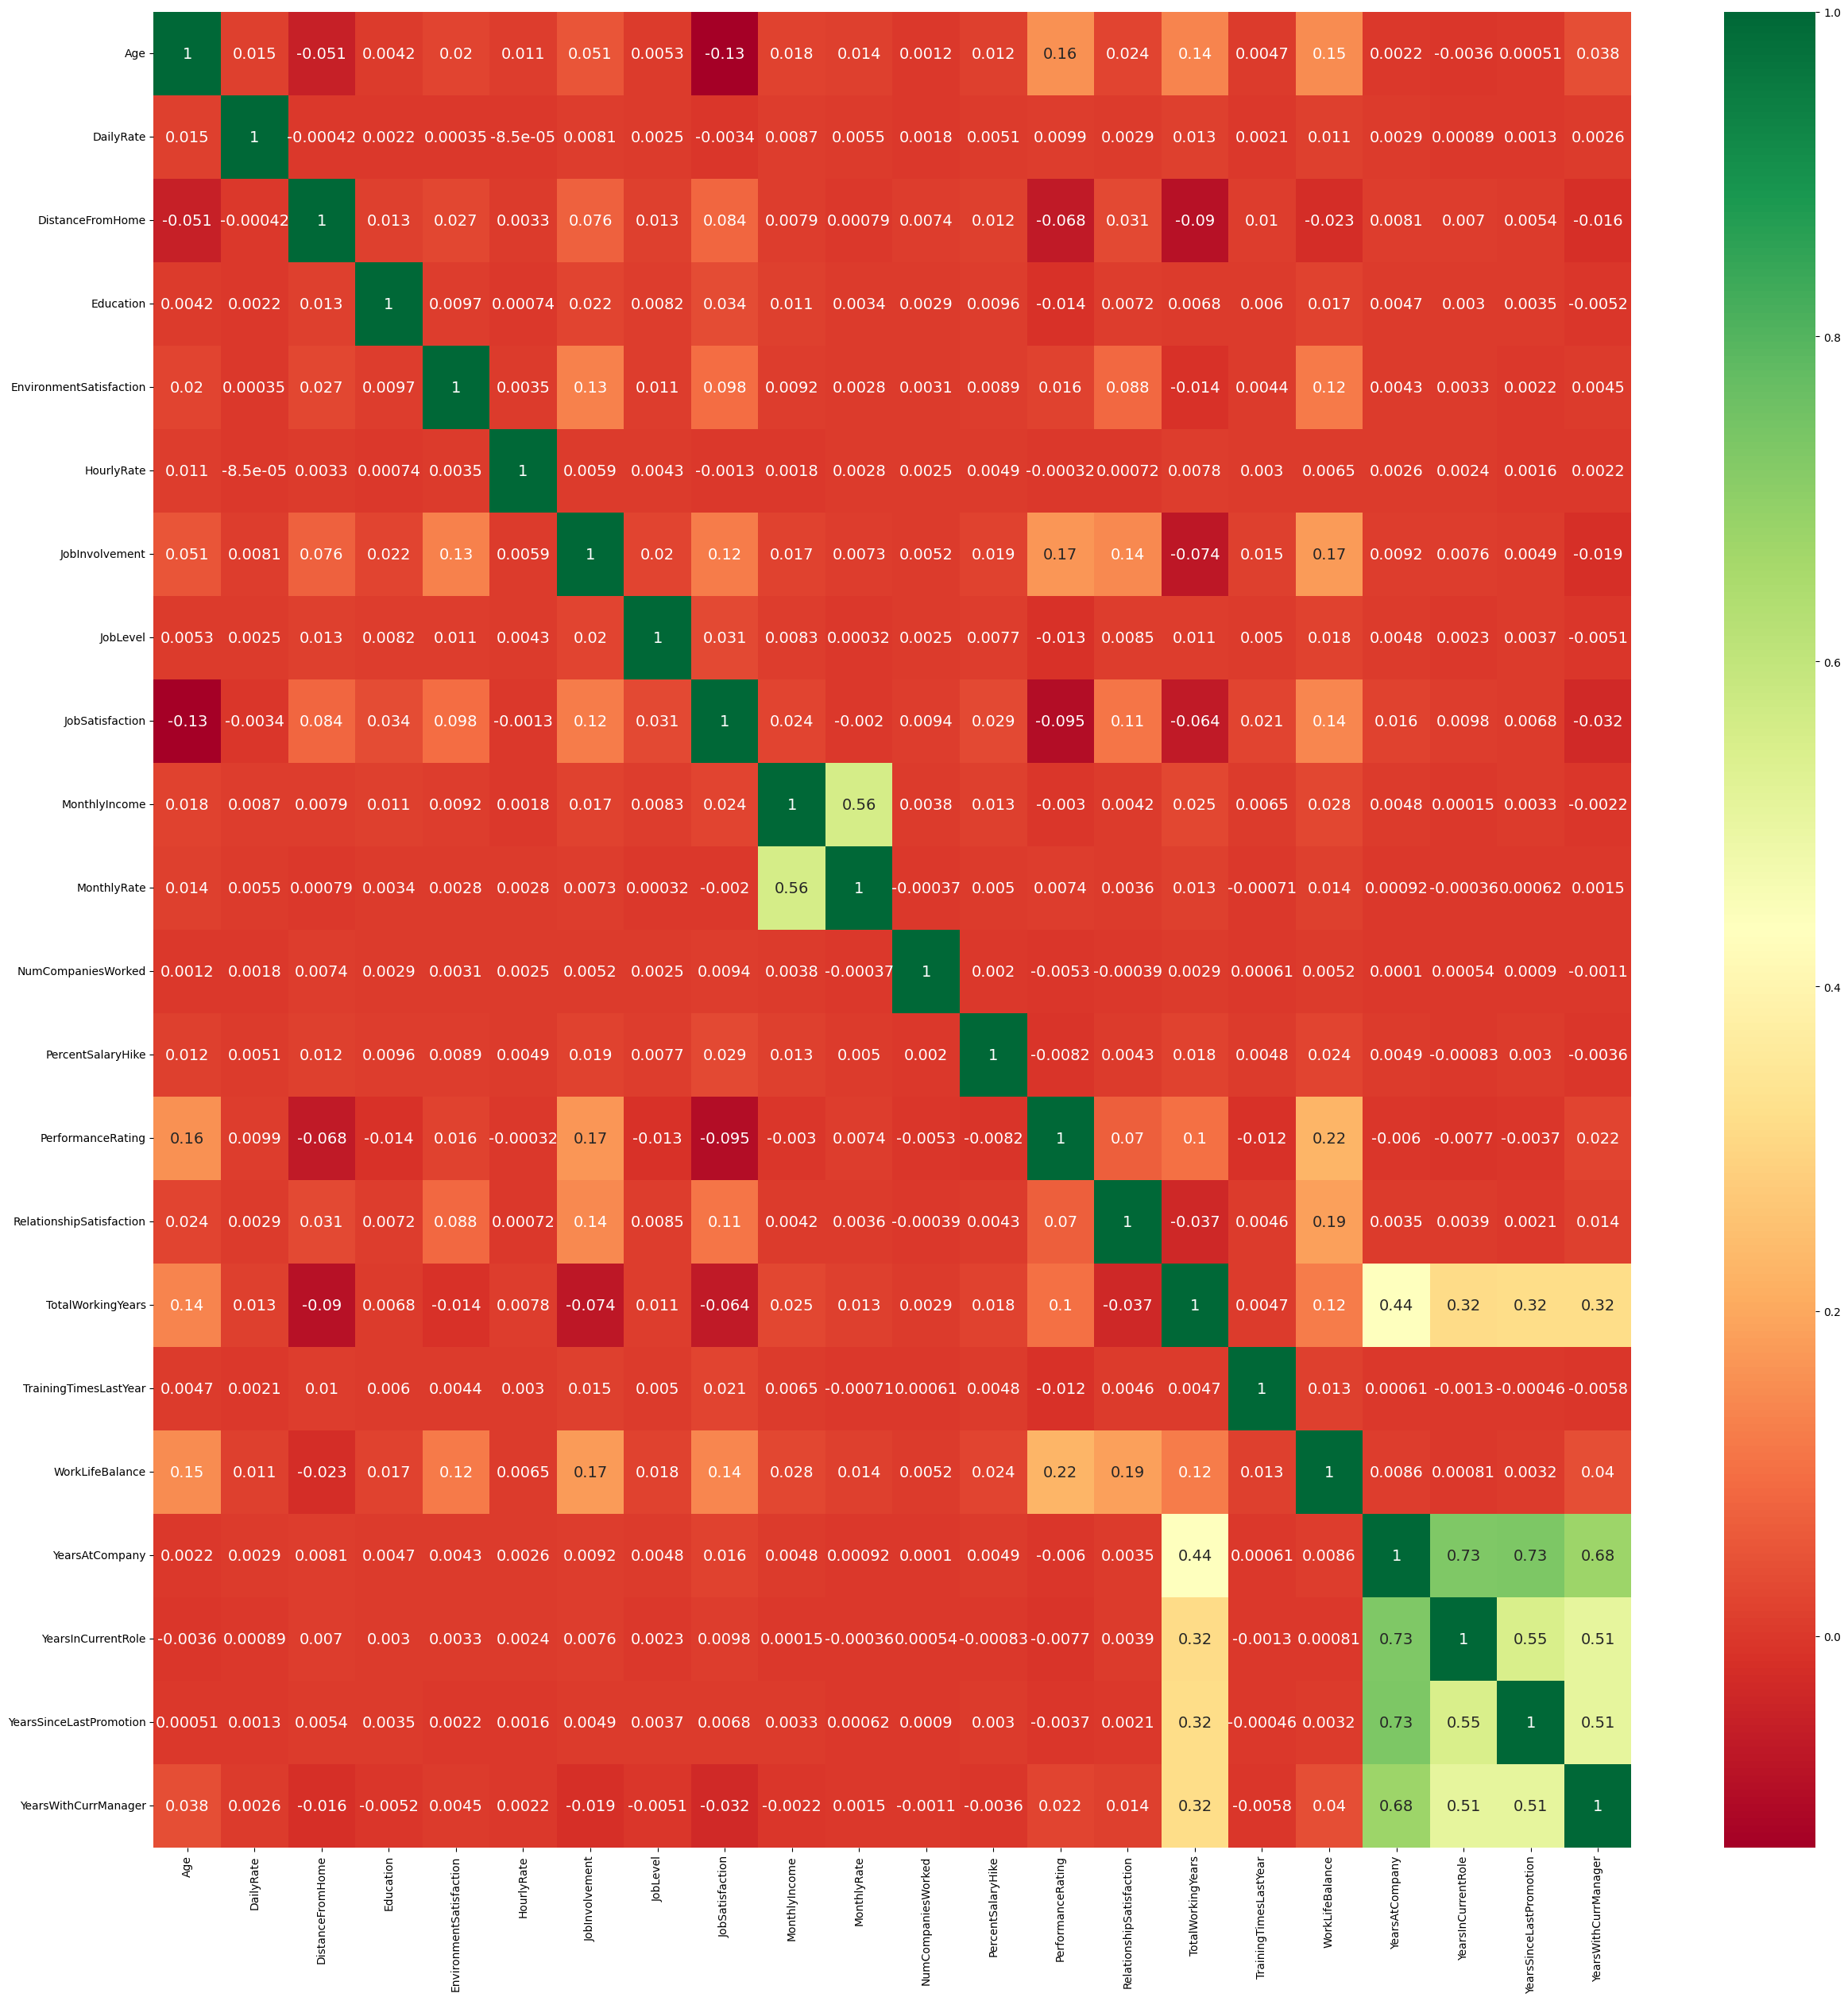

In [18]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":14})
plt.show()

Heatmap to understand the correlation between all the numerical features. It shows Job Level and Monthly Income has a strong correlation. Higher the performance rating, higher the salary hike.

# Distribution of Employee attrition

In [19]:
Attrition_count=df['Attrition'].value_counts()
Attrition_count

No     402914
Yes    298375
Name: Attrition, dtype: int64

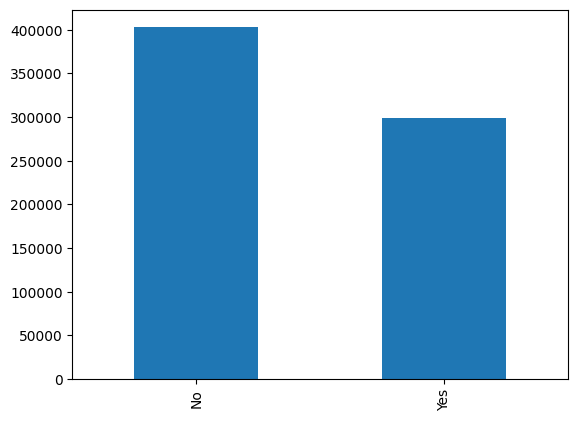

In [20]:
df['Attrition'].astype(str).value_counts().plot(kind='bar')
plt.show()

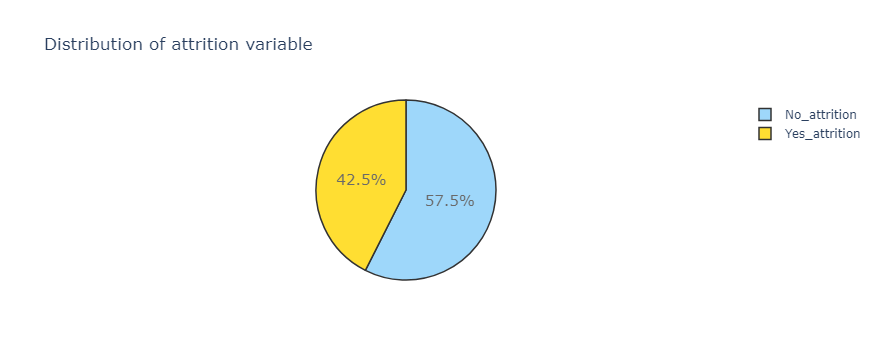

In [21]:
#  Distribution of attrition variable

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

From above pie chart, we come to know that the % of No attrition is more than % of Yes attrition by 14.8%.

# Analysis of rating features

In [22]:
#JobSatiesfaction
#Environment Satiesfaction
#RelationShip Satiesfaction
#jobinvolvement
#Worklifebalanec
#performanceRating

In [23]:
df['JobSatisfaction'].value_counts()

1    346844
2    174657
3    102189
4     77599
Name: JobSatisfaction, dtype: int64

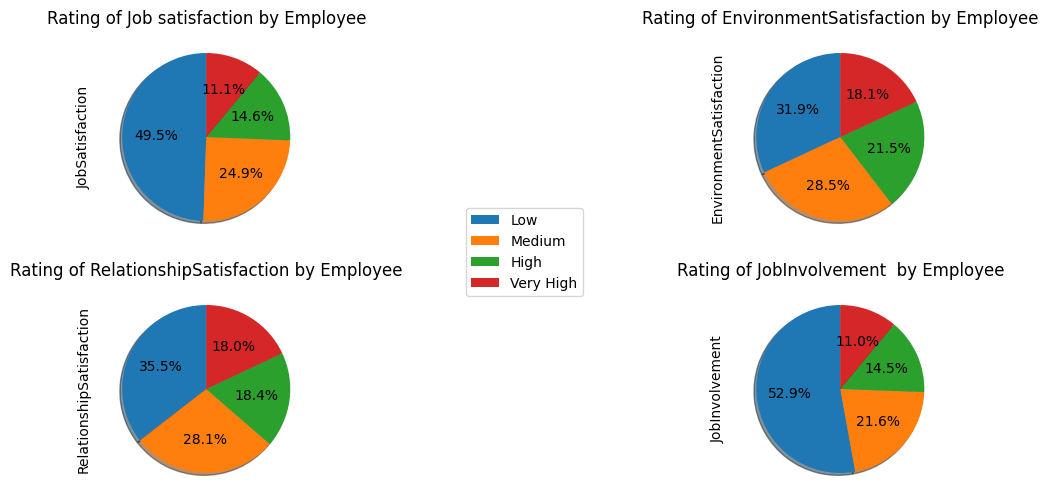

In [24]:
fig=plt.figure()
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

labels=['Low','Medium','High','Very High']

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,ax=ax1)
ax1.set_title('Rating of Job satisfaction by Employee')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,ax=ax2)
ax2.set_title('Rating of EnvironmentSatisfaction by Employee')


df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,ax=ax3)
ax3.set_title('Rating of RelationshipSatisfaction by Employee')


df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,ax=ax4)
ax4.set_title('Rating of JobInvolvement  by Employee')

plt.show()


From the above chart we can say that

 (1) 49.2% of total count of employee are not satisfied with their job role.
 
 (2) 31.9% of employees are not having environment satisfaction.
 
 (3) 185978 i.e. almost 35.4% emolyees are not satiesfied by thier realtionship with other subordinates or office colleagues.
 
 (4) The maximum i.e. 52.6% of employees are not sufficiently involved in their job role which may also results in attrition.

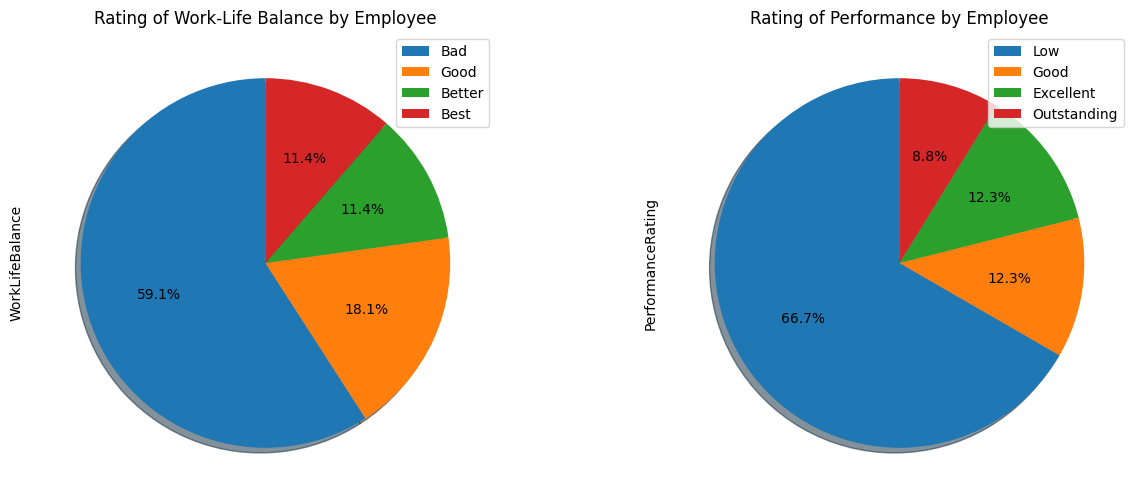

In [25]:
fig2=plt.figure()
ax5=fig2.add_subplot(121)
ax6=fig2.add_subplot(122)

labels_list1=['Bad','Good','Better','Best']
labels_list2=['Low','Good','Excellent','Outstanding']

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,ax=ax5)
ax5.set_title('Rating of Work-Life Balance by Employee')
ax5.legend(labels=labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',figsize=(15,6),autopct='%1.1f%%',startangle=90,shadow=True,labels=None,ax=ax6)
ax6.set_title('Rating of Performance by Employee')
ax6.legend(labels=labels_list2,loc='upper right')
plt.show()

1. The above plot shows that 58.8% of the employee have rated their work life balance as bad.

2. An almost of 66.3% of the employees earned low perforamce rating.

# Analysis of work Experience
Years at company Years in current role years since last promotion years with current manager total working years

In [26]:
we=df[['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TotalWorkingYears','Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,28,1,11,1,36,Yes
1,19,19,18,2,11,Yes
2,10,7,10,2,12,Yes
3,9,7,7,3,33,Yes
4,1,1,1,2,19,No


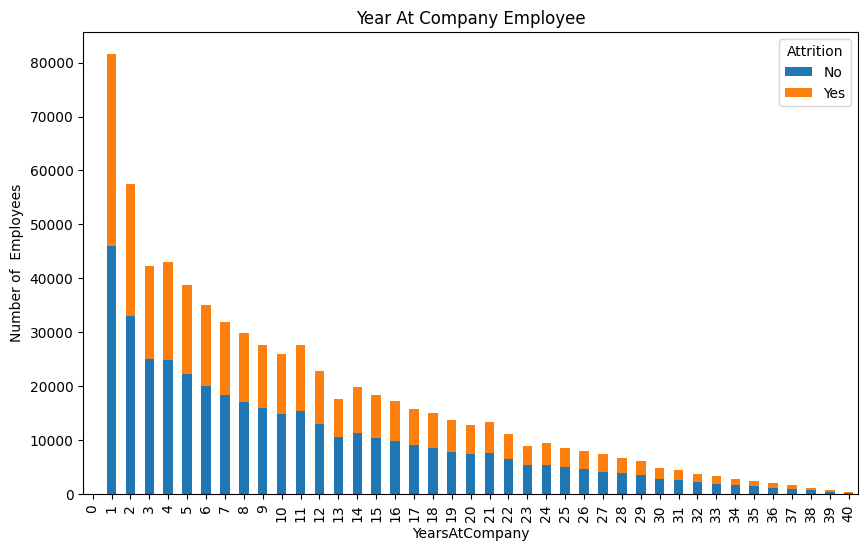

In [27]:
YearsAtCompany=df.groupby("YearsAtCompany")["Attrition"].value_counts(normalize=False).unstack()
YearsAtCompany.plot(kind='bar',stacked='False',figsize=(10,6))
plt.title("Year At Company Employee")
plt.ylabel("Number of  Employees")
plt.show()

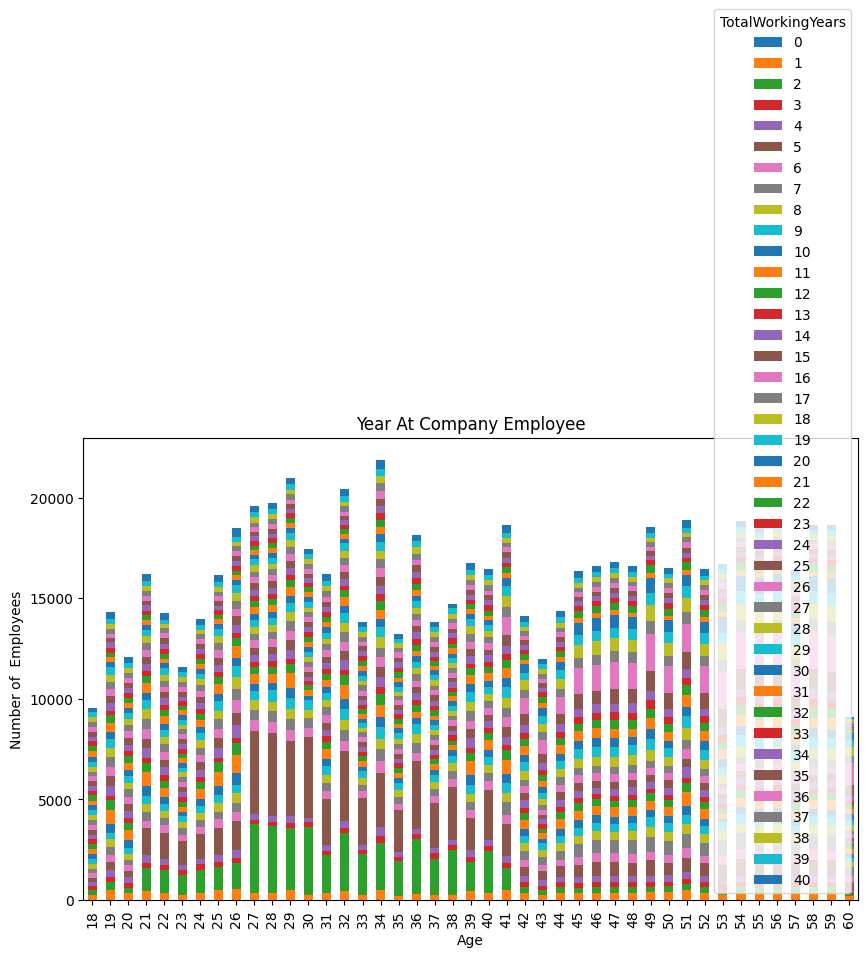

In [28]:
YearsAtCompany=df.groupby("Age")["TotalWorkingYears"].value_counts(normalize=False).unstack()
YearsAtCompany.plot(kind='bar',stacked='False',figsize=(10,6))
plt.title("Year At Company Employee")
plt.ylabel("Number of  Employees")
plt.show()

From the above chart we observed that the employees with less of years of experience or have invested less years with same company are having highest rate of quitting the job. Thus, more concern should be given to the freshers or experience lacker and the causes behind quitting the job by newly arrived professionals should be investigated.

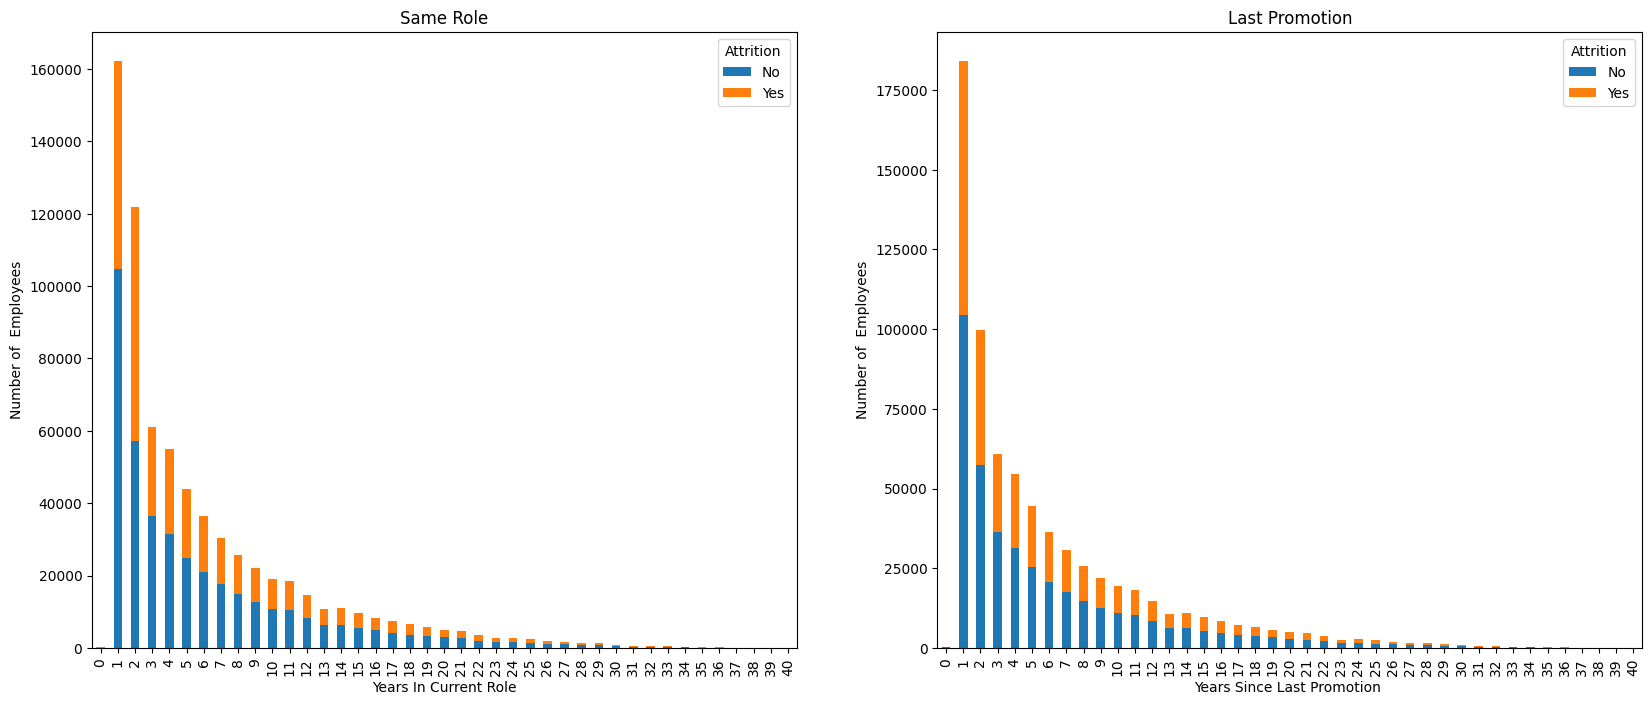

In [29]:
YearsInCurrRole=df.groupby("YearsInCurrentRole")["Attrition"].value_counts(normalize=False).unstack()
YSLP=df.groupby("YearsSinceLastPromotion")["Attrition"].value_counts(normalize=False).unstack()

fig=plt.figure()
ax0=fig.add_subplot(121)
ax1=fig.add_subplot(122)

YearsInCurrRole.plot(kind='bar',stacked='False',figsize=(20,8),ax=ax0)
ax0.set_title("Same Role")
ax0.set_xlabel("Years In Current Role")
ax0.set_ylabel("Number of  Employees")



YSLP.plot(kind='bar',stacked='False',figsize=(20,8),ax=ax1)
ax1.set_title("Last Promotion")
ax1.set_xlabel("Years Since Last Promotion ")
ax1.set_ylabel("Number of  Employees")
plt.show()


1. From the above chart which is showing the comparison of attriton of employees having varied number of years at the company, we come to know that the attrition rate is at the highest level in the period on 0-1 year and at the same time by observation we come to know that in comparison of the period of 0-2 years and 2-3 year, we have seen a sudden drop in the rate of employee attrition.
2. The comparative chart of 'Number of Employees' and 'Years Since last promotion' tells us that the employees do not tend to continue on the same post with the increasing number of years.

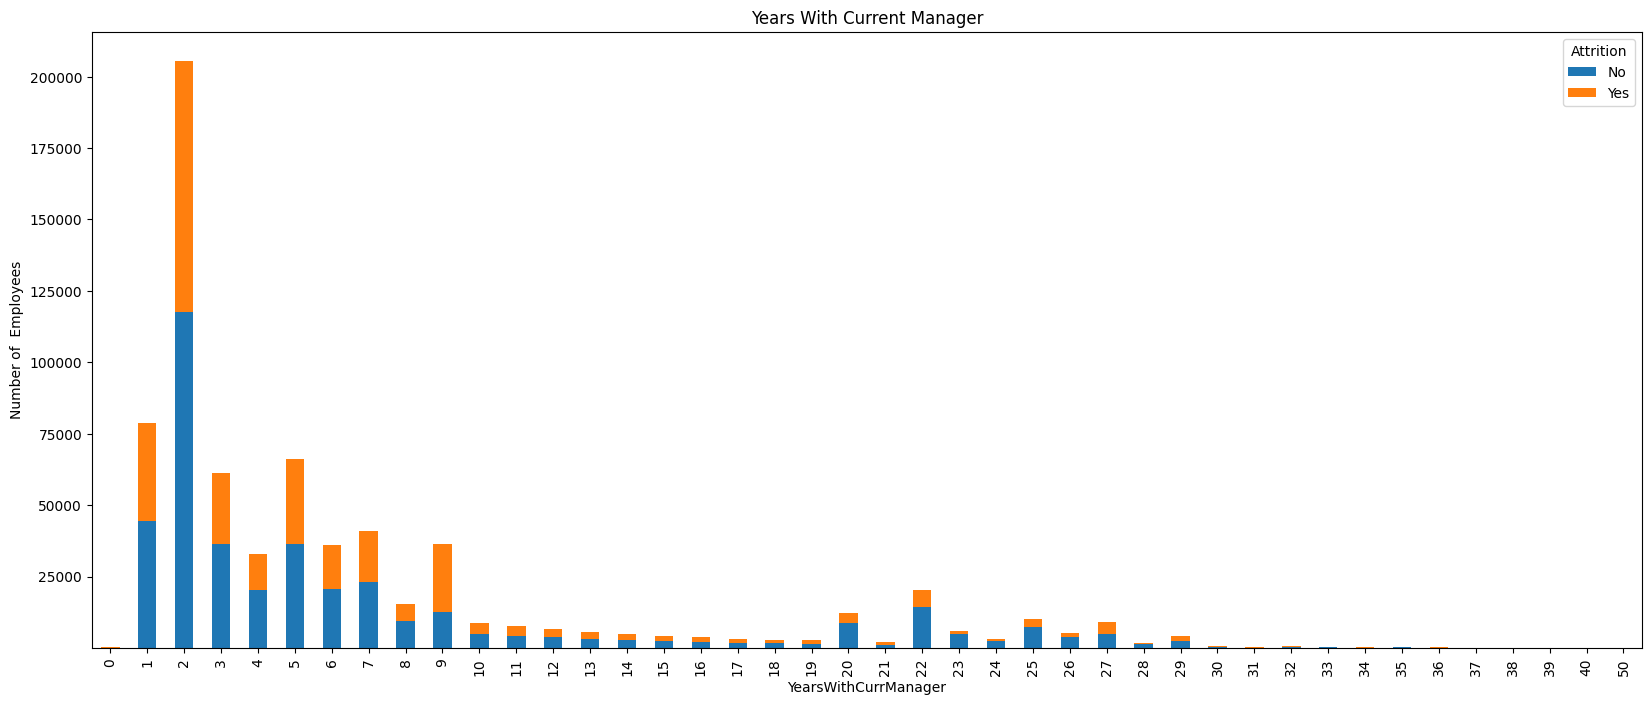

In [30]:
YWCM=df.groupby("YearsWithCurrManager")["Attrition"].value_counts(normalize=False).unstack()
YWCM.plot(kind='bar',stacked='False',figsize=(20,8))
plt.title("Years With Current Manager")

plt.ylabel("Number of  Employees")
plt.show()


The above graph gives us the comparison between 'number of employees who worked with current manager' and 'the respective years they have invested with current manager', thus we get the result as the starting phase of the career or at the start of new job role at new company, attrition rate is high within the span of 2 years. As well as, this analysis is very much subjective but still it is noticed that the work relation with manager and the employee is not that good hence it is recommended that manager should try to communicate with the employee in order to decrease the attrition rate.

In [31]:
# visualize some continuous data
#age vs Attrition
sns.jointplot(x='Attrition',y='TotalWorkingYears',data=df)

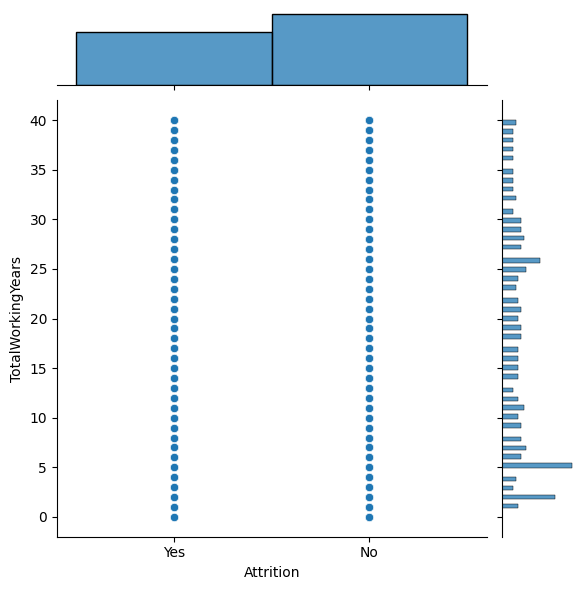

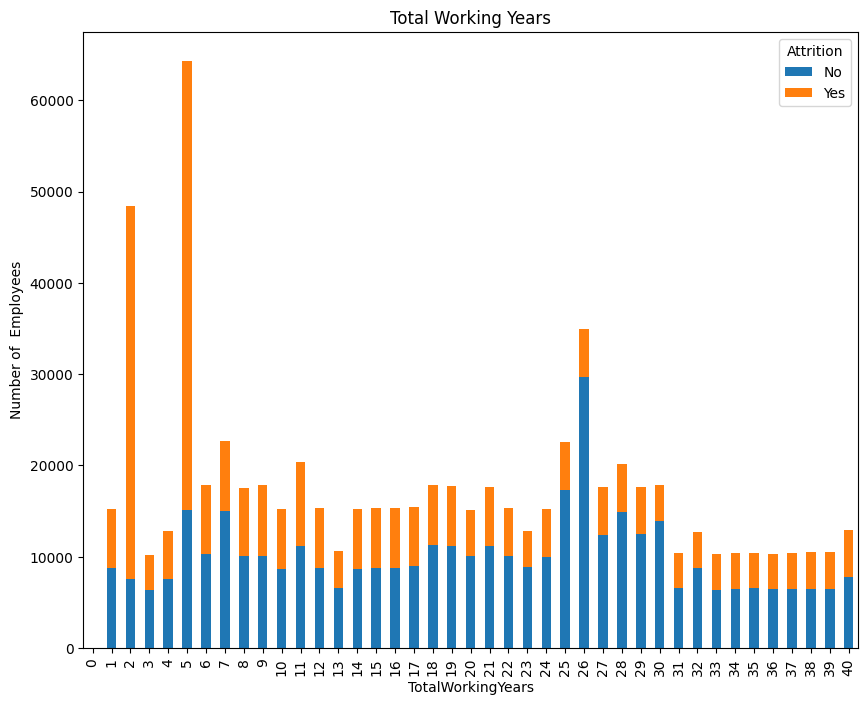

In [32]:
TWE=df.groupby("TotalWorkingYears")["Attrition"].value_counts(normalize=False).unstack()
TWE.plot(kind="bar",stacked='False',figsize=(10,8))
plt.title("Total Working Years")

plt.ylabel("Number of  Employees")
plt.show()

It is observed that there is high number of employee who leaves company at (0-5) years of experience. So it is very important that company to create such a policy to handle freshers so that they don't leave the company at the start of thier career.

# Analysis of Monthly Income

In [33]:
mi=df[df['Attrition']=='Yes']['MonthlyIncome']
mi=mi.reset_index()
mi.drop(['index'],axis=1,inplace=True)

mn=df[df['Attrition']=='No']['MonthlyIncome']
mn=mn.reset_index()
mn.drop(['index'],axis=1,inplace=True)


mi['mn']=mn
mi.rename(columns={'MonthlyIncome':'Yes','mn':'No'},inplace=True)
mi.head()

,Yes,No
0,14278,40369
1,16080,29116
2,45651,18435
3,37126,13735
4,45359,28903


In [34]:
df.groupby("Attrition")["MonthlyIncome"].mean()

Attrition
No     25603.986434
Yes    24789.239162
Name: MonthlyIncome, dtype: float64

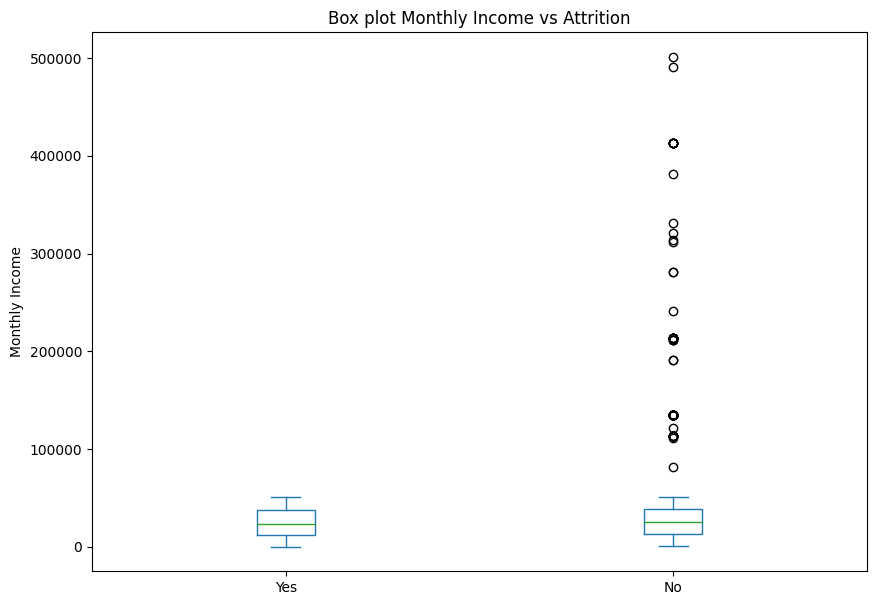

In [35]:
mi.plot(kind='box',figsize=(10,7))
plt.title("Box plot Monthly Income vs Attrition")
plt.ylabel("Monthly Income")
plt.show()

We can say if employee get average salary employee do not leave company.

# Is Attrition depends on percentage salary hike?

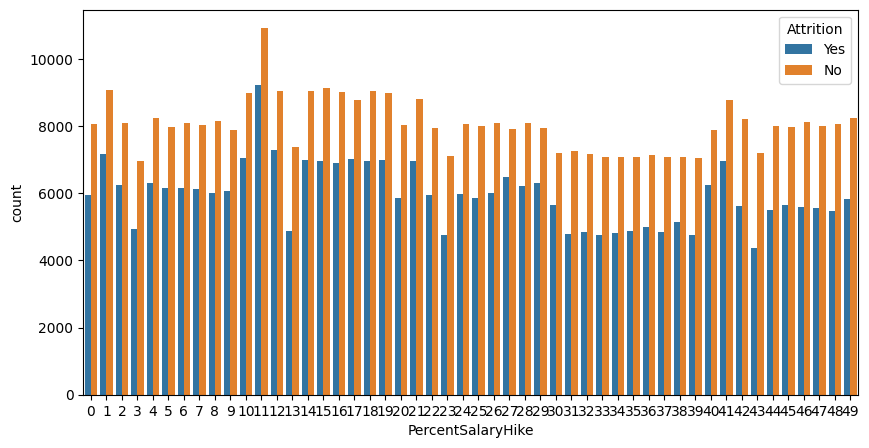

In [36]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'PercentSalaryHike',hue='Attrition', data = df )
plt.show()

By observing above chart we come to the conclusion that while giving salary hike, attrition is at the highest at the 11% as well as we can also say that discussing salary hike ranging from 11% to 13% tends to give attrition rate from maximum to minimum. We can also say that company should try to give average hike by 13% so that attrition will be minimal.

# Over time employee Analysis

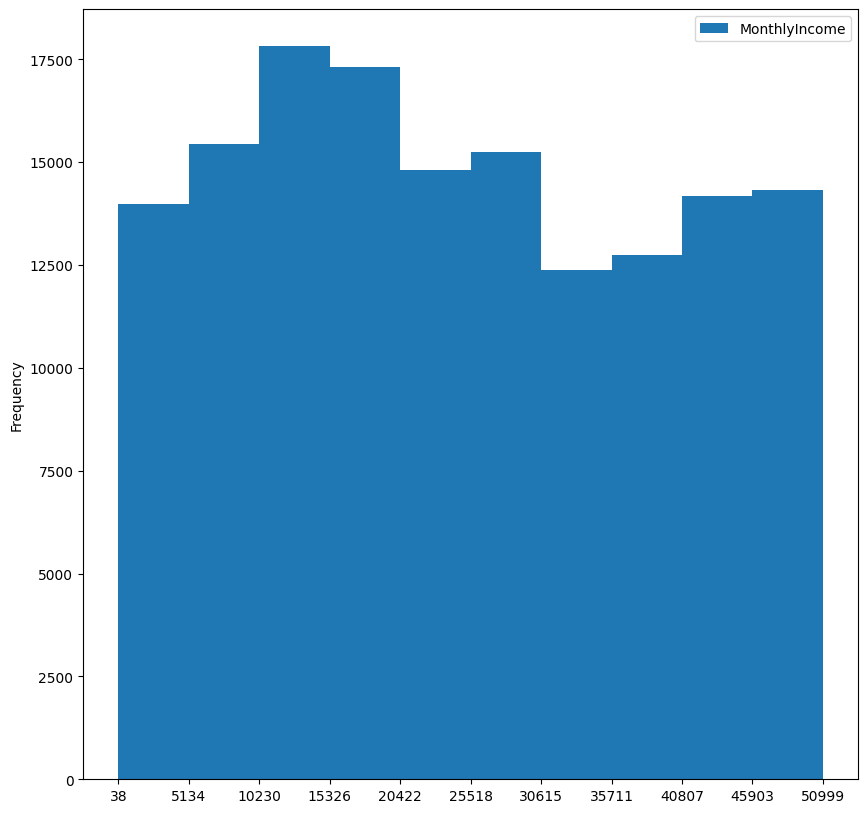

In [37]:
dot=df[['OverTime','MonthlyIncome','Attrition']]
oyay=dot[(df['OverTime']=='Yes') & (df['Attrition']=='Yes')]
oyay=oyay.sort_values(by='MonthlyIncome',ascending=False,axis=0)
count,bin_edges=np.histogram(oyay['MonthlyIncome'])
oyay.plot(kind='hist',xticks=bin_edges,figsize=(10,10))
plt.show()

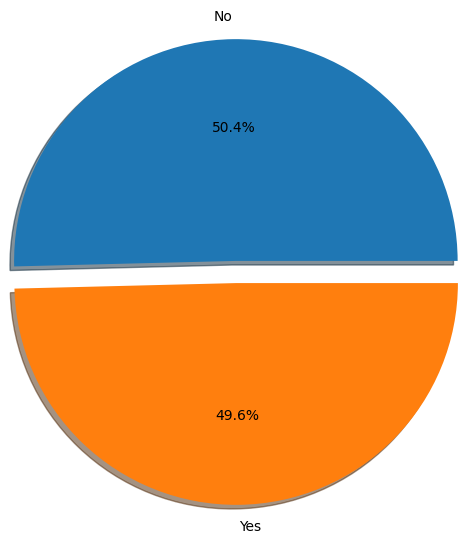

In [38]:
r = df.groupby('OverTime')['OverTime'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);
plt.show()

The above chart tells us that overall 50.4% of total employees don't work for overtime.

# How is attrition affected by gender?

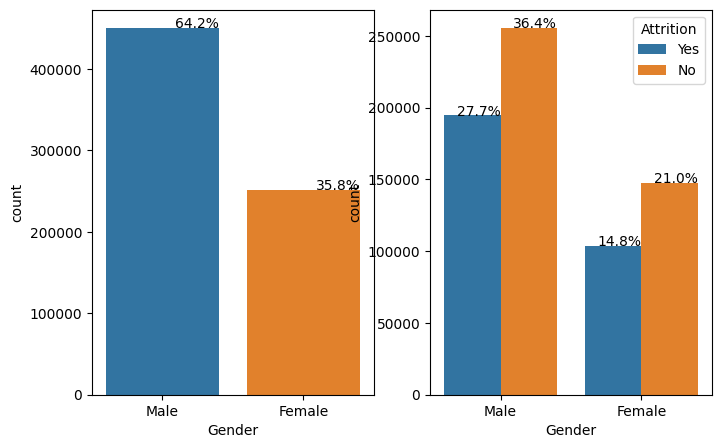

In [39]:
plt.figure(figsize=(8,5))
total = float(len(df))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

The rate of attrition of male employee is more i.e. 8.6% as compared to attrition of female employee i.e. 6.3%. More specifically we can say that attrition in male employees is more than by 43366 in female employees.

# What is effect of age on attrition?

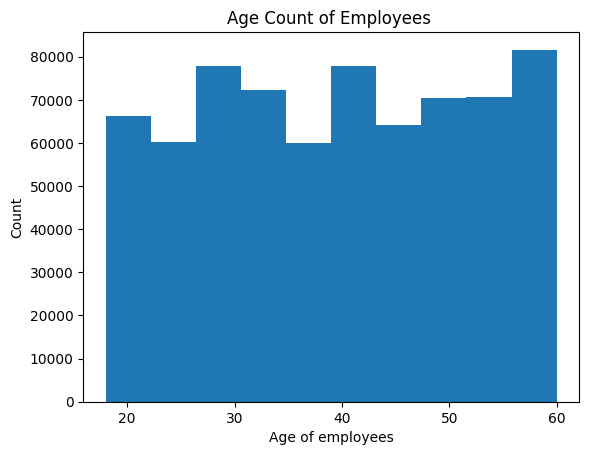

In [40]:
#Histogram showing the age distribution of the employees

plt.hist(df["Age"])
plt.xlabel("Age of employees")
plt.ylabel("Count")
plt.title("Age Count of Employees ")
plt.show()

From above graph knows that the count of employee is higher over 58 age.

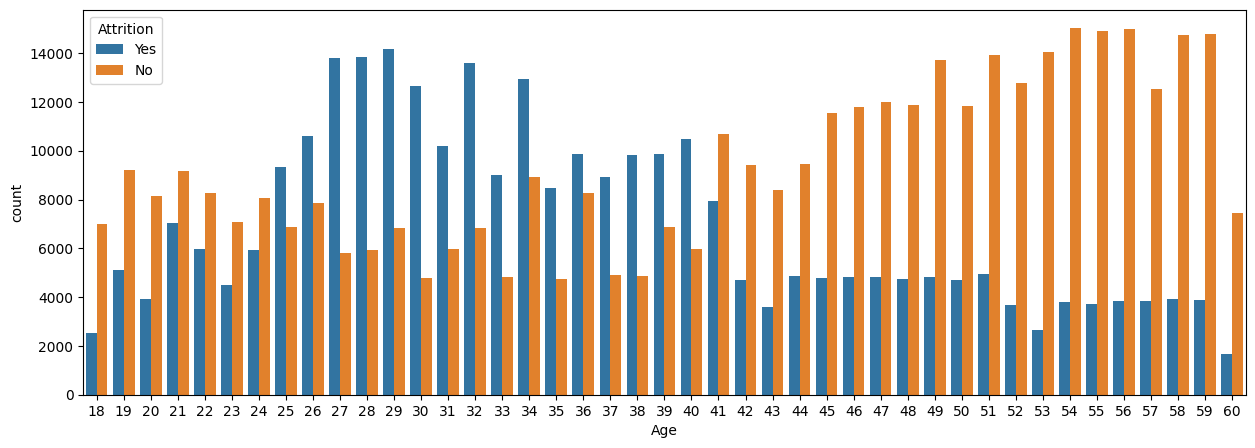

In [41]:
plt.figure(figsize = (15, 5))
sns.countplot(x = 'Age',hue='Attrition', data = df )
plt.show()

From the above chart which is showing the attrition rate according to age distribution here we come to know that at the age of 27 to 41 there is empoyee attrition rate is highest, on the other side experience peoples attrition rate is low. 

In [42]:
# visualize some continuous data
#age vs Attrition
sns.jointplot(x='Attrition',y='Age',data=df)

# what is Age density distribution by attrition?

In [43]:
attrition_yes = df.loc[df["Attrition"] == 'Yes']
attrition_no = df.loc[df["Attrition"] == 'No']

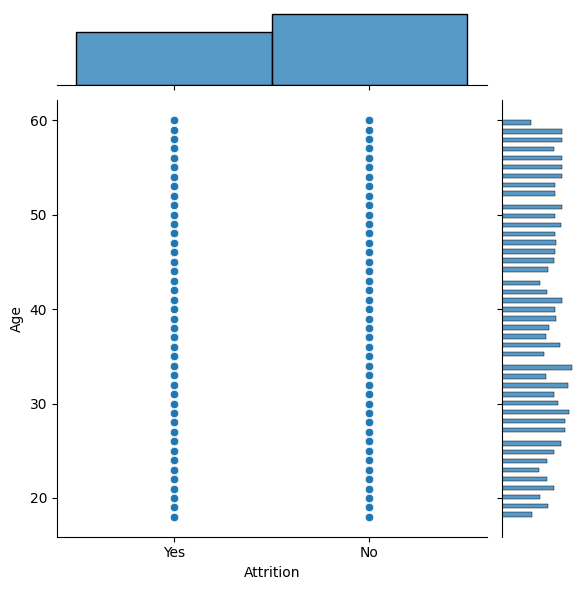

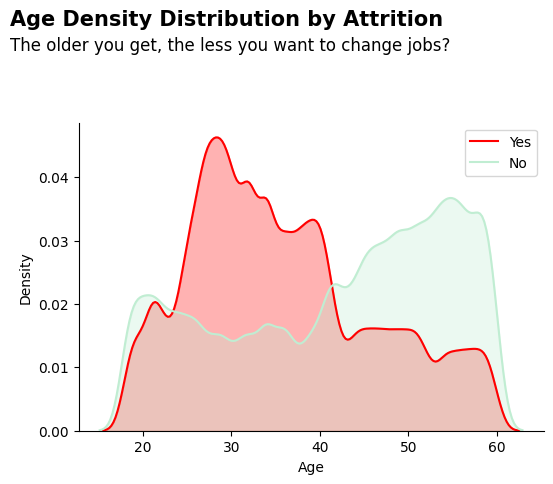

In [44]:
plt.figure(figsize=(6,4))
ax = sns.distplot(attrition_yes["Age"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["Age"],hist=False,label="No",color="#C0EDD2")

plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#C0EDD2", alpha=0.3)
sns.despine()
ax.text(5,0.064,"Age Density Distribution by Attrition",
        fontsize=15,        
         fontweight='bold') 
ax.text(5,0.06,"The older you get, the less you want to change jobs?",
        fontsize=12) 
plt.show(block=False)

The above displot shows that the attrition rate is highest in the age group of 20 to 40 and then the attrition rate decreased for the age above 45.

# How Is Attrition Affected by business travels?

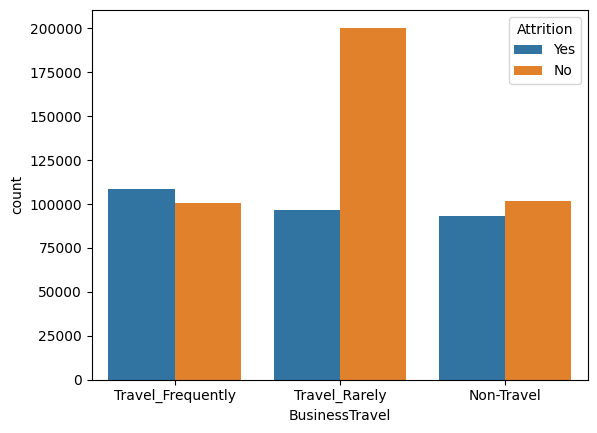

In [45]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df);
plt.show()

In [46]:
df.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           101765
                   Yes           92995
Travel_Frequently  Yes          108526
                   No           100687
Travel_Rarely      No           200462
                   Yes           96854
Name: Attrition, dtype: int64

Most employees who travel rarely don't leave the company. From the above plot we come to know that sending employees on business travels are not doesn't really make much of a difference and doesn't have a significant effect on attrition.

So the Business Travel is not one of the main factors causing attrition but who travel frequently have biggest percentage

Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the employee business travel interest.

# What is the most Department of attritions ?

In [47]:
df['Department'].value_counts()

Research & Development    147222
Support                   101324
Sales                     100929
Software                  100475
Hardware                   96270
Human Resources            87979
Life Sciences              46832
Technical Degree           20258
Name: Department, dtype: int64

In [48]:
dpm=df.groupby("Department")["Attrition"].value_counts().unstack()
dpm=dpm.transpose()
dpm

Department,Hardware,Human Resources,Life Sciences,Research & Development,Sales,Software,Support,Technical Degree
Attrition,,,,,,,,
No,61600,63993,29819,67592,50994,50638,66557,11721
Yes,34670,23986,17013,79630,49935,49837,34767,8537


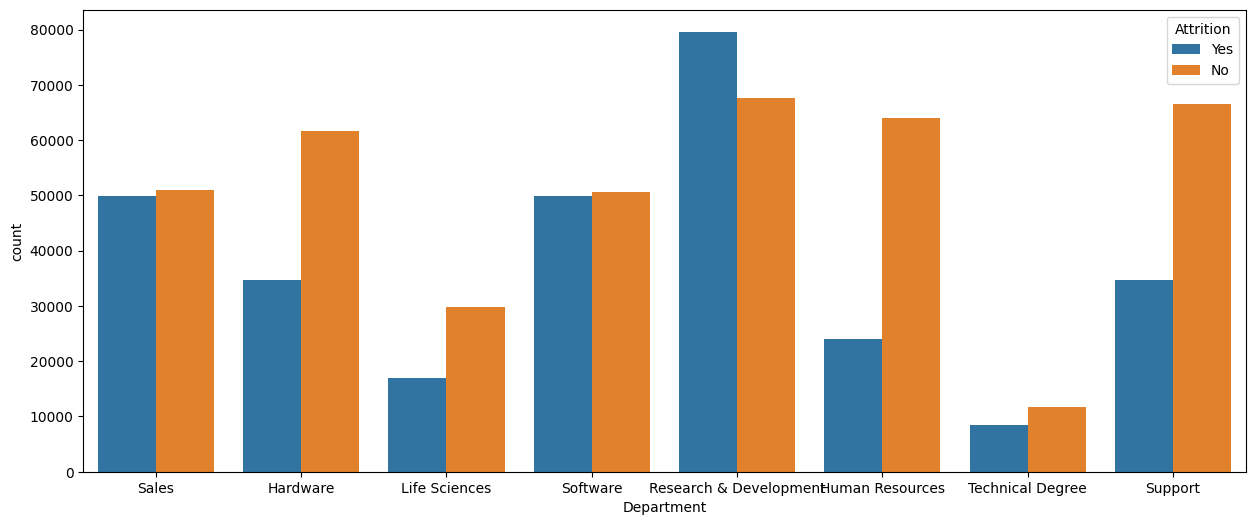

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.show()

By observing above chart we come to know that most attritions are from the research & development department. support has the least number of attritions. 
But we need to keep in mind that HR has a lot more employees than other department.

If we considered percentage of attritions per department, we would see that the HR department has most attritions.

# what is effect of the distance from home on attrition ?

In [50]:
df.groupby('DistanceFromHome')['Attrition'].value_counts().unstack()

Attrition,No,Yes
DistanceFromHome,,
1,11566,2782
2,9557,2766
3,7540,2783
4,9318,2766
5,9565,2719
6,9666,2803
7,9495,2843
8,9539,2736
9,9378,2713


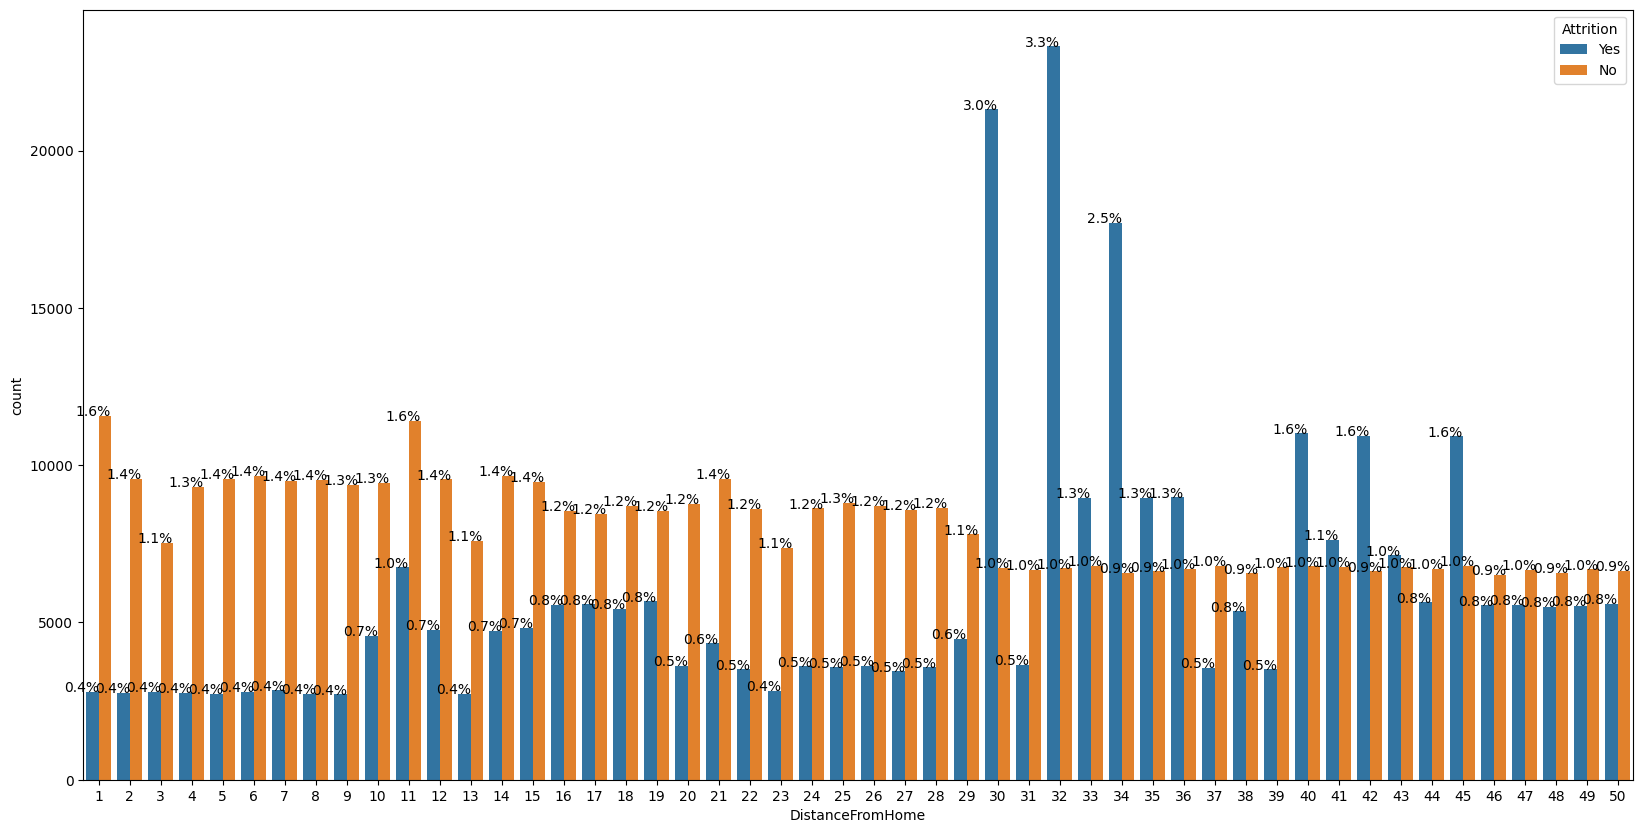

In [51]:
plt.figure(figsize=(20,10))
total = float(len(df))
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')

ax = sns.countplot(x="DistanceFromHome", hue="Attrition", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

By observing above chart we come to know that Most of the people who leave the company are located more than 28 km away from the company. This might be reason of emoloyye attrition.

# what is effect of the DailyRate on attrition?

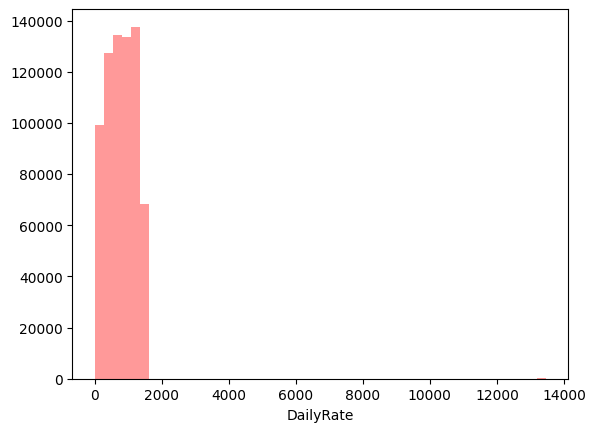

In [52]:
sns.distplot(df['DailyRate'], kde = False, color ='red')
plt.show()

In [53]:
df['DailyRate'].value_counts()

111     991
1111    991
114     780
116     769
411     750
       ... 
98        3
71        3
83        3
66        1
26        1
Name: DailyRate, Length: 1500, dtype: int64

# Analysis of marital Status

In [54]:
df['MaritalStatus']=df['MaritalStatus'].replace('Singlle','Single')

In [55]:
ms=df[['MaritalStatus','Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Single,Yes
1,Married,Yes
2,Single,Yes
3,Single,Yes
4,Divorced,No


In [56]:
ms['MaritalStatus'].value_counts()

Married     462599
Single      153227
Divorced     85463
Name: MaritalStatus, dtype: int64

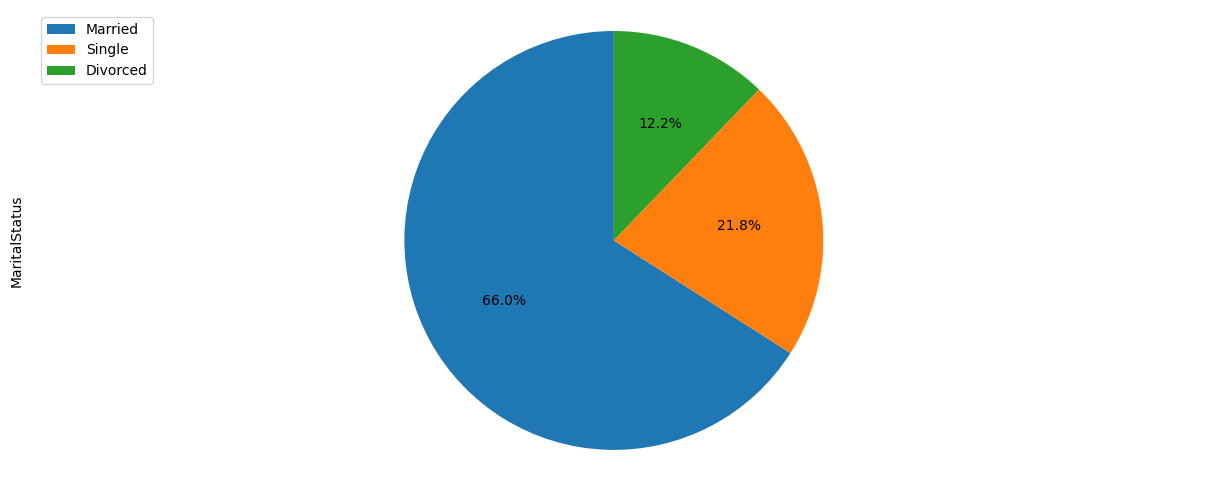

In [57]:
ms['MaritalStatus'].value_counts().plot(kind="pie",figsize=(15,6),autopct='%1.1f%%',startangle=90,labels=None)
plt.axis('equal')
plt.legend(labels=['Married','Single','Divorced'],loc='upper left')
plt.show()

The above chart tells us that overall 66.0% of total employees are married in company.

In [58]:
Ms=df.groupby("MaritalStatus")["Attrition"].value_counts().unstack()
Ms=Ms.transpose()
Ms

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,50964,268443,83507
Yes,34499,194156,69720


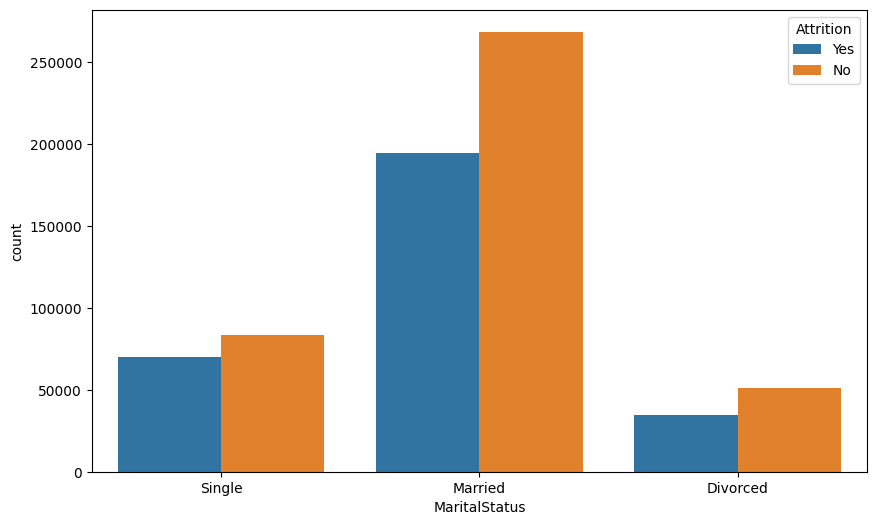

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.show()

From the above graph we can say that the count of married employees to leave the company is high.
but It is also important that the company has a large number of married employees.

# Do Education Field play a role?

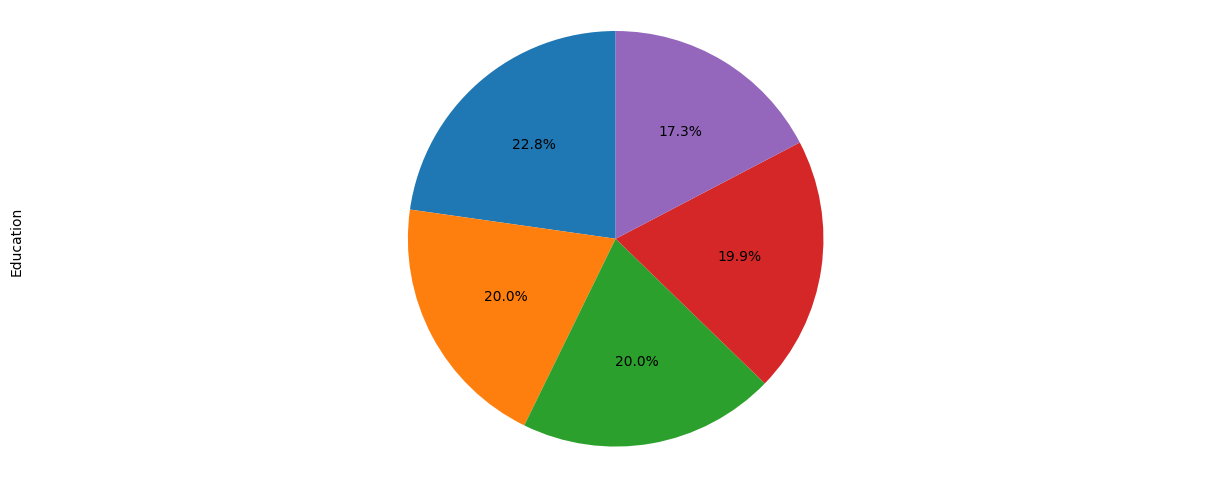

In [60]:
df['Education'].value_counts().plot(kind="pie",figsize=(15,6),autopct='%1.1f%%',startangle=90,labels=None)
plt.axis('equal')
#plt.legend(labels=['Married','Single','Divorced'],loc='upper left')
plt.show()

In [61]:
Ms=df.groupby("Education")["Attrition"].value_counts().unstack()
Ms=Ms.transpose()
Ms

Education,1,2,3,4,5
Attrition,,,,,
No,89257,80506,72130,80599,80422
Yes,70297,59670,49394,59675,59339


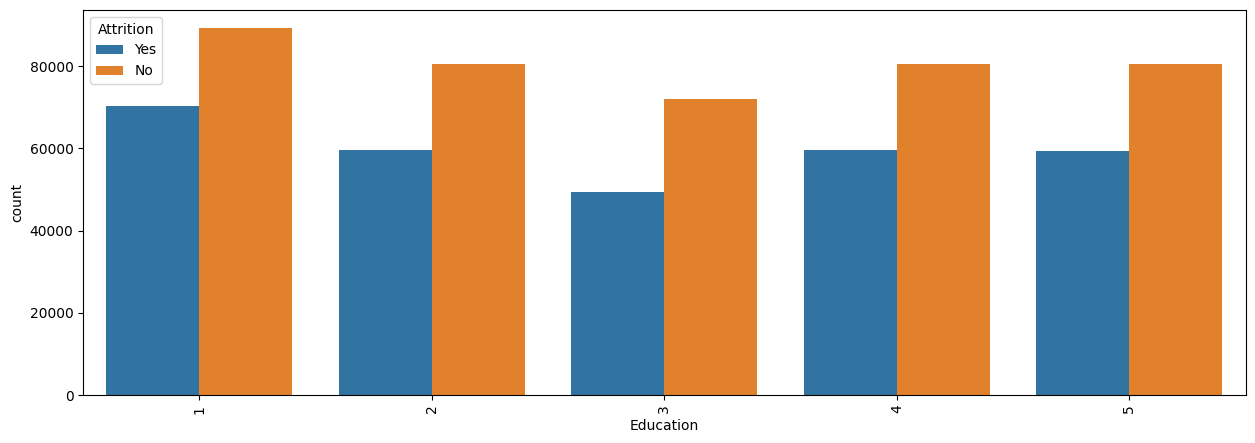

In [62]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90)
sns.countplot(x = 'Education',hue='Attrition', data = df )
plt.show()

From above chart we know that for level 1 and 2 of education have more attrition rate

# Analysis of Job Role

In [63]:
Ms=df.groupby("JobRole")["Attrition"].value_counts().unstack()
Ms=Ms.transpose()
Ms

JobRole,Developer,Healthcare Representative,Human Resources,Human Resources Executive,Human Resources Representative,Laboratory Technician,Life Sciences,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Technical Degree
Attrition,,,,,,,,,,,,,,
No,40144.0,40491.0,15179.0,8280.0,8309.0,40257.0,17839.0,40483.0,39831.0,40278.0,40489.0,32239.0,32062.0,7033.0
Yes,47860.0,24367.0,6205.0,NaN,NaN,33007.0,10090.0,23362.0,28530.0,23406.0,35462.0,35929.0,24949.0,5208.0


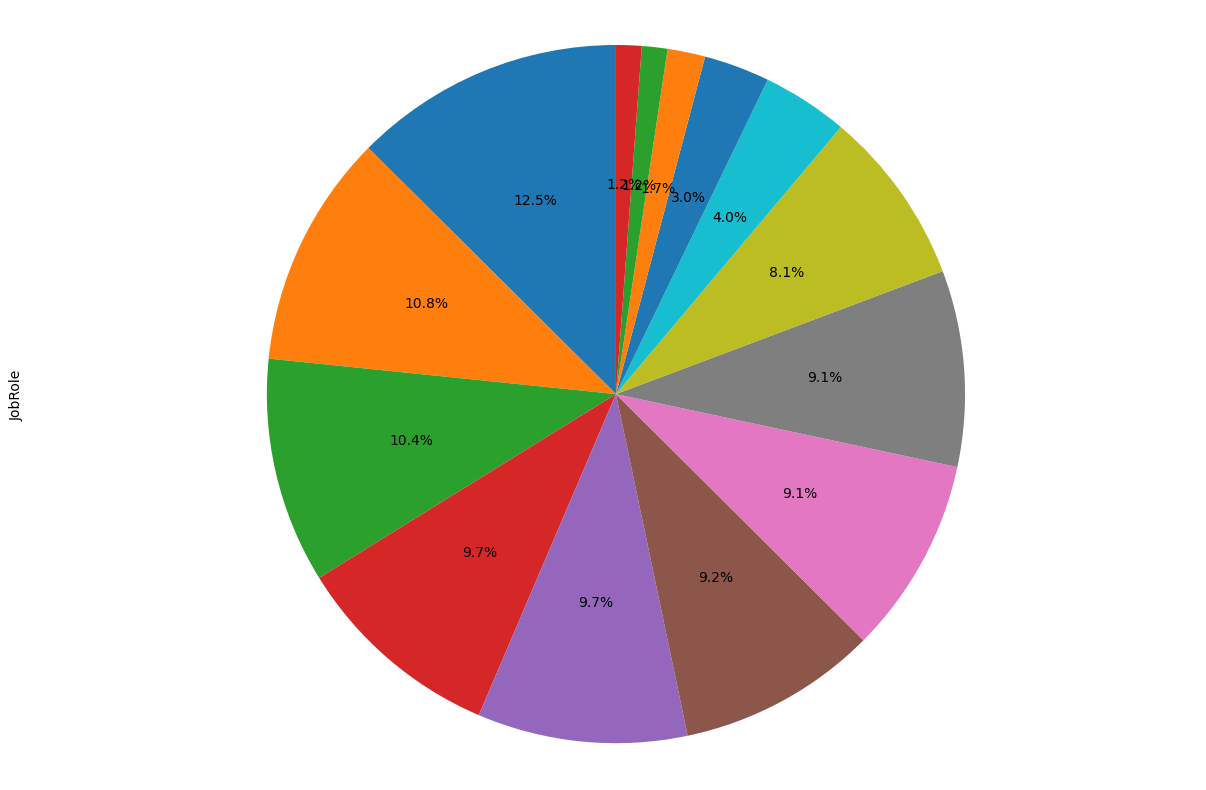

In [64]:
df['JobRole'].value_counts().plot(kind="pie",figsize=(15,10),autopct='%1.1f%%',startangle=90,labels=None)
plt.axis('equal')
#plt.legend(labels=['Married','Single','Divorced'],loc='upper left')
plt.show()

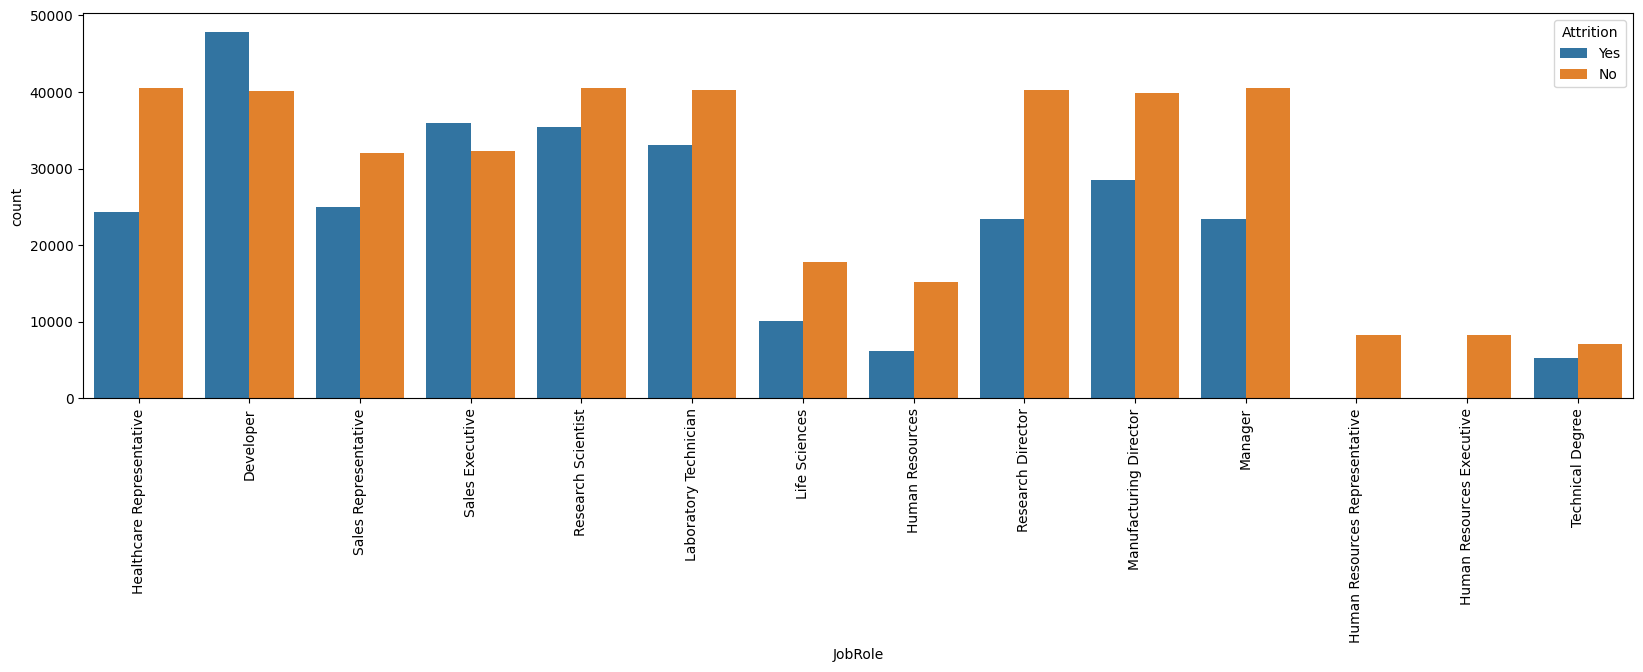

In [65]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
sns.countplot(x = 'JobRole',hue='Attrition', data = df )
plt.show()


From the above graph we can say that most of the developers leave the organization around 35748. Therefore, there is a need to give promotion and incentives according to work. The manager should try to communicate with the employees to reduce the attrition rate.

In [66]:
fig,axss = plt.subplots(2,4, figsize=[20,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()
plt.savefig('cate_dist.png');

PermissionError: [Errno 13] Permission denied: 'cate_dist.png'

This graph shows graphical representation of catgorical columns.

In [68]:
df.hist(figsize=(20,15))
plt.tight_layout()

This graph shows graphical representation of nuemric columns.